# Data Exploration

In order to generate meaningful insights from data, you need to have a good understanding of your data and what it represents. Exploratory data analysis (or "EDA" as it's known) is a very crucial step in the data science pipeline. It's also a very fun process that requires creativity and curiosity, by asking bold questions about the data and testing initial hypotheses. It's certainly *not* a formal process with a defined set of steps. 

<img src="https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif"/>

As you explore the data, you'll start to discover patterns, detect anomalies (outliers), and validate whether your initial assumptions are still valid. 

Now that we're equipped with clean data (Part 3: Data Cleaning) and data visualization tools (Part 4: Data Visualization), let's start exploring our data! 🚀

## Importing our dependencies

The first thing we need to do is import our dependencies (the Python packages that we'll be using). For this analysis, we'll be using:

- [pandas](https://pandas.pydata.org/) - data manipulation and analysis 🛠️
- [seaborn](https://seaborn.pydata.org/) - data visualization 📈
- [matplotlib](https://matplotlib.org/) - data visualization 📈

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

Next, let's import our newly cleaned dataset:

In [2]:
df = pd.read_csv("data/nyc_real_estate_clean.csv")

## Descriptive Statistics 

[Descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) is the process of describing and summarizing your data using statistical methods. It gives you a sense of the distribution of your data and whether there are any outliers. During EDA, you'll want to use descriptive statistics to investigate all variables* of your dataset. 

- **❗Note:** A "variable" refers to a column in your dataframe.

How you approach descriptive statistics will depend on the _type_ of variable you're dealing with.

<img width="50%" src="https://media.giphy.com/media/3orieVr84udUl4wbQs/giphy.gif"/>


### Types of  Variables

There are two main types of variables: 

**1. Categorical**

A variable is "categorical" if it can be stored into categories. A categorical variable can be either nominal (no order) or ordinal (order matters). 

- **Nominal:** no logical order (e.g., NYC borough)
- **Ordinal:** data can be sorted (e.g. building safety rating on a scale from 1 to 10)


**2. Numerical**

A variable is "numerical" if it represents the measurement of something. A numerical variable can be either discrete or continuous. 

- **Discrete:** countable elements (e.g., number of rental units)  
- **Continuous:** unlimited number of values (e.g., square footage)

<img width="70%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/variable_types.png"/>

### Summarizing Categorical Data 

We have several categorical varialbes in our NYC dataframe, including:

- `borough`
- `neighborhood`
- `building_class_category`

#### NYC Boroughs

Let's start exploring the "borough" column and count how many properties were sold in each borough. The easiest way to do this is with [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html), which does exactly what it says: it counts the number of times each value appears in the data. 

In this case, we'll use `value_counts()` to count the number of times a given borough appears in our data.


In [3]:
df['borough'].value_counts()

Brooklyn         21928
Queens           17711
Manhattan        12865
Bronx             6328
Staten Island     5849
Name: borough, dtype: int64

The output of `value_counts()` will always be ordered from highest frequency to lowest frequency. We can see that Brooklyn has the highest number of property sales while Staten Island has the lowest. Interestingly, the number of property sales was almost 4 times higher in Brooklyn as compared to the Staten Island. 🤯

We can also get the percentage breakdown of property sales by borough by passing in `normalize=True` inside `value_counts()`. This will convert the output from counts to proportions which sum to 1. 

In [4]:
df['borough'].value_counts(normalize=True)

Brooklyn         0.339018
Queens           0.273821
Manhattan        0.198899
Bronx            0.097834
Staten Island    0.090428
Name: borough, dtype: float64

Brooklyn represents ~34% of property sales in NYC, followed by Queens at 27% and Manhattan at 20%. Meanwhile, only 10% of property sales occured in the Bronx and 9% in the Bronx.

Another way of interpreting borough data is to visualize it using a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

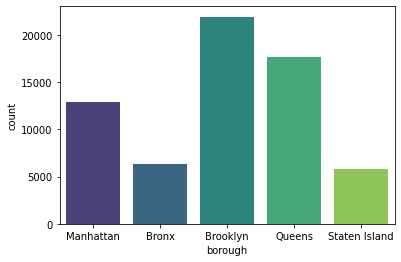

In [5]:
sns.countplot(x='borough', data=df, palette='viridis');

With Seaborn's `countplot()`, we simply need to configure:
- `x`: the categorical variable that we're interested 
- `data`: the dataframe that we're using 
- `palette`: a color palette that we'd like to use (totally optional but fun!)

You can check out all of the default palettes provided by Seaborn [here](AP_seaborn_palette.md).


```{note}
Why is there a semi-colon at the end of the seaborn code? This semi-colon is not necessary, but without it, you will get some text abovoe your plot that looks like this: `<matplotlib.axes._subplots.AxesSubplot at 0x1263354d0>`. The semi-colon removes that code so that plots looks cleaner. 

Another option is to add `plt.show()` before rendering your plot. Feel free to try it out!
```

#### Building Class Category

In additional to boroughs, we also have data on a property's building class category. This is another categorical variable that's worth investigating:

Unlike `borough`, which only have 5 possible values, there are many possible values for `building_class_category`. We can count the number of unique values using [nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html):

In [6]:
df['building_class_category'].nunique()

46

Wow! There are a lot of building classes. Are the NYC properties in our dataset evenly distributing across all 46 building classes or are they mostly concentrated in a handful of classes? Let's take a look at the 5 most common building classes:

In [7]:
df['building_class_category'].value_counts(normalize=True).head()

One family dwellings            0.223543
Two family dwellings            0.202347
Coops - elevator apartments     0.183253
Condos - elevator apartments    0.129111
Three family dwellings          0.056554
Name: building_class_category, dtype: float64

It looks like a large proportion of properties fall under one of 5 building classes. We can figure out the exact percentage by apply `sum()` to the output above:

In [8]:
df['building_class_category'].value_counts(normalize=True).head().sum()

print(f"{df['building_class_category'].value_counts(normalize=True).head().sum():.2%}")

79.48%


Around 79.5% of NYC properties belong to one of the top 5 building classes.

If we take a look at the actual building class names, this makes sense:

- **One family dwellings** = detached homes
- **Two, Three family dwellings** = duplex and triplex buildings, respectively
- **Coops/Condos** - rental apartments and condos

##### Visualizing Category Freuency with Word Clouds
Another way to visualize building class category is to create a [word cloud](https://en.wikipedia.org/wiki/Tag_cloud) - a visual representation of text data. Using this [wordcloud](https://amueller.github.io/word_cloud/index.html) Python package, we can visualize building class categories by frequency. Large text represents more frequent buildling classes and small text represents less frequent building classes.

To create a word cloud, you need to import the `WordCloud` class from `wordcloud`:

In [9]:
from wordcloud import WordCloud

Then you have to initialize a `WordCloud` instance. This is where you define what background color the word cloud should have, what the maximum and minimum font size should be, and how many words it can hold. For a list of all possible settings to configure, check out the documentation [here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). 

In [10]:
wc = WordCloud(
    background_color="white",
    max_words=2000, 
    max_font_size=300,  
    width=1800, height=800
)

Once you have your world cloud initialized with all of the right settings, you can use the `generate_from_frequencies()` method to generate a word cloud based on the `building_class_category` column's value counts like this:

In [11]:
wc.generate_from_frequencies(df['building_class_category'].value_counts())

Lastly, and most importantly, you can render your word cloud plot using Matplotlib's `plt.imshow()` function. The extra `plt` lines are meant to customize the word cloud:
- making it bigger → `plt.figsize(figsize=(width,height))`
- removing the plot border → `plt.axis("off")`

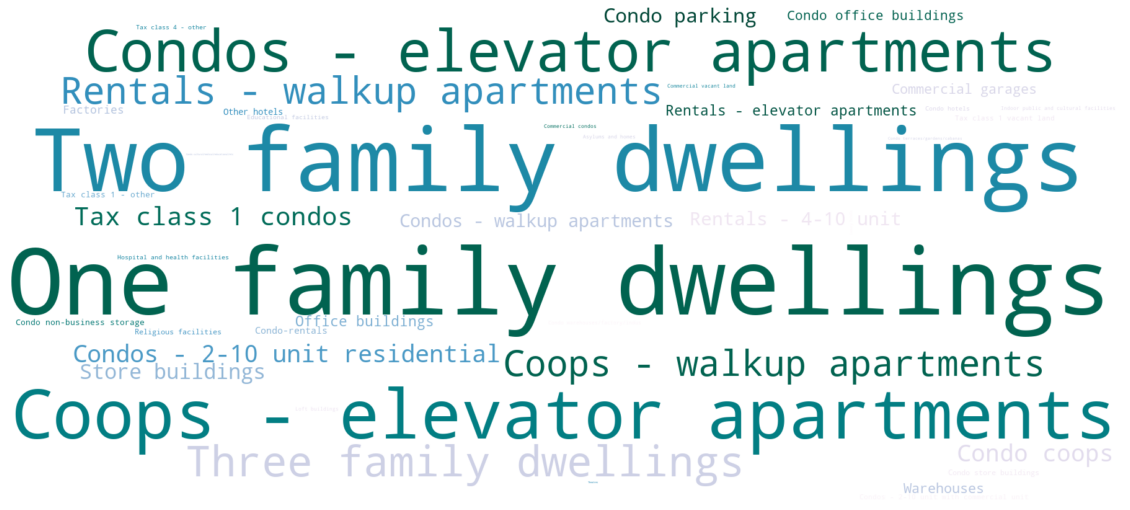

In [12]:
plt.figure(figsize=(20,15))
plt.imshow(wc.recolor(colormap='PuBuGn', random_state=20), interpolation="bilinear")
plt.axis("off")
plt.show()

What an awesome word cloud 😎. It's a nice way to quickly scan the various building categories in our dataset.

If you look closely, you'll notice that some of the properties in our dataset are not residential. For example, we have some properties that classify as "hotels", "condo office buildlings", "warehouses", and "religious facilities". It's important to keep this in mind as we continue our analysis.

### Summarizing Numerical Data 

There are several ways that you can summarize numerical data, including 1) measuring central tendency, and 2) measuring the spread of the data.

#### Measuring Central Tendency 

We can find the central tendency (or “middle”) of the data using mean and median. 

To calculate the **mean** (also known as average) of a numerical variable, you need to divide the sum of the value by the number of observations. 

For example, let’s say we have the sale price of 3 properties:
1. \$100
2. \$200
3. \$300


The mean price would be:

In [13]:
(100+200+300)/3

200.0

The *median* is another way of calculating central tendency. It represents the *exact middle* value. To find out the median sale price, we need to sort them in order, from lowest to highest (or vice versa), then find the middle value:

<img width="50%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/median_1.png">
     
The middle value is 200. In this particular example, $\text{mean} = \text{median}$. However, this isn't always the case - especially when there are outliers. 

#### When the mean and median are different 

Let's say there's a new property that gets added to the list and it's worth $10,000. The new mean price would be:

In [14]:
(100+200+300+10000)/4

2650.0

The new median would be 2650 beacuse the "middle" falls between 300 and 10000. 

<img width="50%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/median_2.png">

In this example, there is a huge discrepancy between mean and median when we add a new value of 10,000 to our initial list of 100, 200, and 300. 

```{admonition} Rule of thumb
:class: tip

When the **mean is greater than the median**, the data is skewed to the right. This means that there are a large-value [outliers](https://en.wikipedia.org/wiki/Outlier) that are pulling the mean value up. 

When the median is greater than the mean, the data is skewed to the left. This means that there are small-value outliers that are pulling the mean value down.
```

* An "outlier" is a value that differs substantially from the rest of the data.

#### Measuring Spread 

Spread (also known as "dispersion") is another useful measure for numerical variables. Spread helps us understand how far apart the values are in our dataset. 

[Standard deviation](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/introduction-to-standard-deviation) is a measure of _how far_ values are from the **mean**. The more disperse the data, the larger the standard deviation. Its mathematical formula looks like this:

$\sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$

You can calculate the standard deviation of a list of numbers using NumPy's [`std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html) method:

In [15]:
import numpy as np

np.std([100,200,300])

81.64965809277261

To calculate the standard deviation of a dataframe column, you can use the Pandas Series' `std()` method:

In [16]:
df['sale_price'].std()

11716293.54909658

```{note}
Standard deviation can't be negative. A standard deviation close to 0 indicates that the values tend to be close to the mean. A standard deviation equal to 0 indicates that all values equal the mean. 
```

#### Percentiles 

The standard deviation is a useful measure of spread when your data follows a normal distribution ($\text{mean} = \text{median}$). But if your data is *skewed* (i.e., *not* normally distributed), then quantiles (percentiles) are a better measure of spread. 

```{note}
The $n^{th}$ percentile is a value such that $n$% of values fall at or below it.
```

For example: if you performed very well on a test and ranked in the 99th percentile, this means that 99% of the other test-takers had a score that was either the same as yours or below it. In other words, you scored in the top 1%.  

**Quartiles** are a common type of percentile that is used to measure spread. This involves dividing your data into quarters:

<img width="50%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/quartiles.png"/>

The three quartiles are:
- 1st quartile (**Q1**, 25th percentile): 25% of values are smaller than Q1 and 75% are larger 
- 2nd quartile (**Q2**, 50th percentile): 50% of values are smaller than Q2 and 50% are larger (equivalent to the median)
- 3rd quartile (**Q3**, 75th percentile): 75% of values are smaller than Q3 and 25% are larger

To get the quartiles of a numerical variable, you can use the `quantile()` method:

**1st quartile (25th percentile)**

In [17]:
df['sale_price'].quantile(0.25)

235513.0

**2nd quartile (50th percentile, median)**

In [18]:
df['sale_price'].quantile(0.5)

530000.0

**3rd quartile (75th percentile)**

In [19]:
df['sale_price'].quantile(0.75)

937000.0

Alternatively, if you wanted to summarize all quartiles, along with measuring mean, standard deviation, minimum value and maximum value, you can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [20]:
df['sale_price'].describe()

count    6.468100e+04
mean     1.279183e+06
std      1.171629e+07
min      0.000000e+00
25%      2.355130e+05
50%      5.300000e+05
75%      9.370000e+05
max      2.210000e+09
Name: sale_price, dtype: float64

```{note}
The descriptive statistics generated from `describe()` exclude missing values. 
```

Interestingly, the minimum sale price is $0. How many properties were sold for "free"? Let's take a look:

In [21]:
(df['sale_price'] == 0).value_counts(normalize=True)

False    0.858057
True     0.141943
Name: sale_price, dtype: float64

15% of NYC property sales were sold at $0. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

Where are these property transfers (inheritance) happening? Let's take a look at the borough distribution:

In [22]:
df[df['sale_price'] == 0]['borough'].value_counts(normalize=True)

Brooklyn    0.828123
Bronx       0.171877
Name: borough, dtype: float64

83% of the $0 property sales are happening in Brooklyn, while 17% are happening in the Bronx.

For the purpose of this analysis, let's assume we only care about property sales over $1000. We can remove anything below this threshold. 

In [23]:
df = df[df['sale_price'] > 1000]

What's the new mean and median price after removing these low-dollar value property sales?

In [24]:
df['sale_price'].median()

630000.0

The median sale price increased by \\$100K - from \\$530,000 to \\$630,000 - after removing suspicious property sales below \\$1000.

### Segmenting Numerical Data by Category

Sometimes, it can be useful to segment your data in different ways to extract new insights. So far, we've analyzed the NYC property sale data as a whole. But what if we segmented this data by borough, property age (old vs. new), or building type (one storey house vs. multi-storey apartment)? Would we see any interesting patterns in median sale price across these segments? 

<img width="60%" src="https://practicalpython.s3.us-east-2.amazonaws.com/assets/data_segmentation.png"/>

Let's practice our segmentation skills by analyzing sale price segemented by borough. We saw that the overall median price was \$630,000 across all boroughs. However, it's possible that the median sale price could be very different from borough to borough. We can investigate this by segmenting sale price by borough. The [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function is useful for segmentation like this:

In [25]:
sale_price_borough = df.groupby('borough')['sale_price'].agg(['median', 'mean']).reset_index()
sale_price_borough

,borough,median,mean
0,Bronx,425000.0,8.656155e+05
1,Brooklyn,775000.0,1.326239e+06
2,Manhattan,1125000.0,3.472688e+06
3,Queens,500000.0,7.420868e+05
4,Staten Island,470000.0,5.159014e+05


We see that the median sale price varies a lot across boroughs. Let's re-order the dataframe from highest to lowest median sale price. We can use [sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) to do this:

In [26]:
sale_price_borough.sort_values(by='median', ascending=False)

,borough,median,mean
2,Manhattan,1125000.0,3.472688e+06
1,Brooklyn,775000.0,1.326239e+06
3,Queens,500000.0,7.420868e+05
4,Staten Island,470000.0,5.159014e+05
0,Bronx,425000.0,8.656155e+05


By default, `sort_values()` sorts rows in ascending order. That's why we had to specify `ascending=False` to make sure the dataframe was sorted in descending (highest to lowest) order. 

We can see from the dataframe above that Manhattan has by far the highest median sale price, while the Bronx has the lowest median price. 

Let's create a Seaborn [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) to visualize the differences in price by borough:

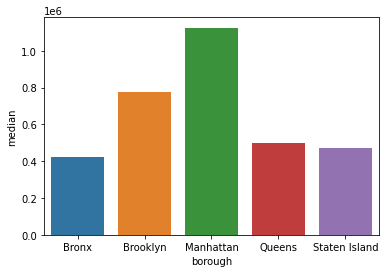

In [27]:
sns.barplot(x='borough', y='median', data=sale_price_borough);

It's not so easy to visualize the price discrepancies when the bars are unsorted. Let's update our plot so that we show the bars in descending order. We can simply pass in the sorted dataframe we created earlier using `sort_values()`:

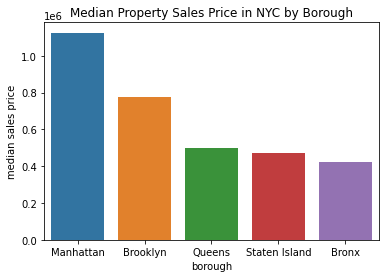

In [28]:
sns.barplot(
    x='borough', 
    y='median', 
    data=sale_price_borough.sort_values(by='median', ascending=False)
)
plt.title('Median Property Sales Price in NYC by Borough')
plt.ylabel('median sales price')
plt.show()

Much better! When the bars are sorted, it's easier to understand which boroughs have the highest and lowest median sales prices.

<img src="https://media.giphy.com/media/srg19CG0cKMuI/giphy.gif"/>

In our newly created dataframe `sale_price_borough`, we calculated the median and mean sales price by borough. Let's compare the two measures side by side to see if there are any differences. We can use [plt.subplot()](../book/04_data_visualization.ipynb#Combining-Multiple-Plots) to do that:

Text(0.5, 1.0, 'Mean')

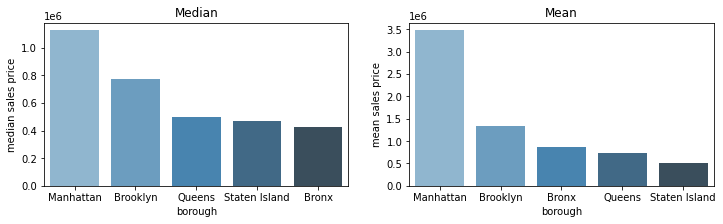

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.barplot(
    x='borough', 
    y='median', 
    data=sale_price_borough.sort_values(by='median', ascending=False),
    palette='Blues_d'
)
plt.ylabel('median sales price')
plt.title('Median')

plt.subplot(1,2,2)
sns.barplot(
    x='borough', 
    y='mean', 
    data=sale_price_borough.sort_values(by='mean', ascending=False),
    palette='Blues_d'
)
plt.ylabel('mean sales price')
plt.title('Mean')

Interesting! Based on the mean and median barplots above, we can see that Manhattan has had some very expensive property sales that pull the mean sales price up. While the Bronx had the lowest median sales price, it actually has the third highest average sales price, meaning that the Bronx has a lot of cheap properties but also has some big outliers which make the average property value not so cheap.

#### Segmenting Year Built by Borough

We can continue to use the borough segmentation and explore other property sale attributes. For example, it would be interesting to understand the average age of homes across boroughs. Does the Bronx have older homes than Staten Island? We can find out by grouping the data by `borough` and calculating the descriptive statistics about `year_built` like this:

In [30]:
df.groupby('borough')['year_built'].agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
borough,,,,
Bronx,1943.872133,1940.0,1883,2016
Brooklyn,1945.771769,1931.0,1800,2016
Manhattan,1952.582028,1955.0,1800,2016
Queens,1949.426402,1949.0,1870,2017
Staten Island,1970.160273,1975.0,1800,2016


In the code above, we created a custom aggregation and specified four statistics to inspect: `mean`, `median`, `min` and `max`. We can see that the median age of homes in Brooklyn is older than in Staten Island. 

Let's say we wanted to plot the distribution of the "year_built" attribute for each borough. This would invovle creating a grid of plots where each plot represents the distribution of home age for a given borough. The first thing we need to do is create a list of boroughs so that we can loop over each borough to create a separate distribution plot. You can get all unique borough names using the [unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) function from Pandas.

In [31]:
boroughs = df['borough'].unique().tolist()
boroughs

['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

With 5 boroughs, there are several options for plot layouts: 
- 1 rows with 5 columns plots 
- 1 column with 5 rows of plots
- 2 rows with 3 and 2 columns plots
- 2 columns with 3 and 2 rows of plots 

I find the multi-row plot to be easier to read so let's use that:

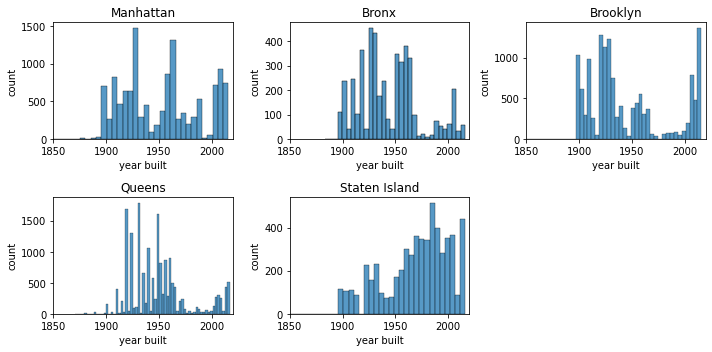

In [32]:
plt.figure(figsize=(10,5))
for i, borough in enumerate(boroughs):
    plt.subplot(2,3,i+1)
    sns.histplot(x='year_built', data=df[df['borough']==borough])
    plt.ylabel('count')
    plt.xlabel('year built')
    plt.title(borough)
    plt.xlim([1850,2020])
plt.tight_layout()

In the code above, we use a for loop to iterate over each borough. In each iteration, we:
- created a subset of the dataframe that filtered for that particular borough
- used the index of the borough to specify the plot location
- customized the plot title to be the borough name 
- applied limits to the x-axis so that the range of years was standardized across all plots

[plt.tight_layout()](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html) is a helpful function to prevent the plots from overlapping ontop of each other. 

#### Segmenting with a Custom Column

Is there a discrepancy in sale price between old and new houses? We could try to answer this question by visualizing the relationship between "year_built" and "sale_price". However, if you take a look at the plot below, you can see that the relationship is not so clear due to outliers.

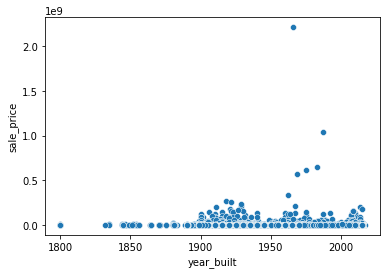

In [33]:
sns.scatterplot(x='year_built', y='sale_price', data=df);

Another approach is to convert "year_built" to a categorical variable. For example, we could segment the year a property was built into the following categories:
- pre-1940
- post-1940

Let's create a function that captures this logic:

In [34]:
def year_category(year):
    if year < 1940:
        return 'pre 1940'
    else:
        return 'post 1940'

Let's test out this custom function with a couple of sample years to make sure it's working as expected:

In [35]:
year_category(1860)

'pre 1940'

In [36]:
year_category(1956)

'post 1940'

Great! Our custom category function works as expected. Let's apply it to the entire "year_built" column. To do this, we can use the [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) functions which allows you to apply a custom functions to your Pandas columns. 

In [37]:
df['year_category'] = df['year_built'].apply(year_category)

Let's visualize the distribution of sale prices by "year_category" using a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). We'll limit sale price to anything below $10M since there are some outliers in our dataset that can skew the results.

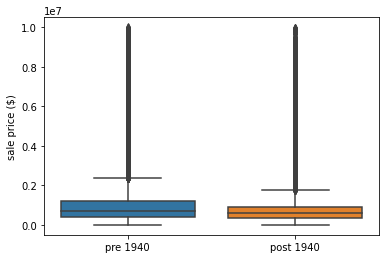

In [38]:
sns.boxplot(x='year_category', y='sale_price', data=df[df['sale_price']<10**7])
plt.xlabel('')
plt.ylabel('sale price ($)')
plt.show()

The plot above shows that older homes, built before 1940, sell for higher than those built after 1940. 

### Working with Datetime Data

In Python, there is a datetime datatype that can be used to represent time-series data. When you first load in your Pandas DataFrame, your datetime columns will be represented as strings. You can convert them to datetime dataype using the Pandas [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function:

In [39]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

Once your column is convereted to datetime, you can pull information like month, year, day of year, or whether it's a weekday or weekend. Let's go ahead and create three columns:
- "sale_month"
- "sale_year"
- "sale_weekday"

In [40]:
df['sale_month'] = df['sale_date'].dt.month
df['sale_year'] = df['sale_date'].dt.year
df['sale_weekday'] = df['sale_date'].dt.weekday

Let's first figure out which year had the most property sales. We can use `value_counts()` to easily calculate this:

In [41]:
df['sale_year'].value_counts(normalize=True)

2017    0.657428
2016    0.342572
Name: sale_year, dtype: float64

We see that 66% of property sales took place in 2017. 

Let's next plot the number of property sales per month. We can do this by combining a scatterplot and lineplot together. The scatterplot is a nice touch to make the data points very visible.

(0.0, 6000.0)

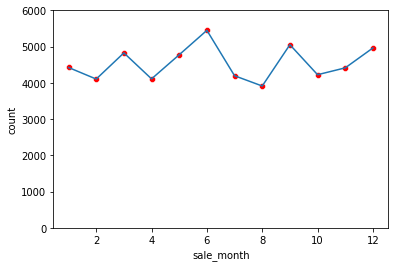

In [42]:
agg_sale_month = df.groupby(['sale_month']).size().reset_index(name='count')

sns.lineplot(x='sale_month', y='count', data=agg_sale_month)
sns.scatterplot(x='sale_month', y='count', data=agg_sale_month, color='red')
plt.ylim([0,6000])

June is the most popular month to sell a property in New York City while August is the least popular. Looking at the trends in the plot above, there isn't too much variation in property sale count across months.

Let's take a look at property sale trends segmented by day of week. 

In [43]:
agg_sale_weekday = df.groupby(['sale_weekday']).size().reset_index(name='count')
agg_sale_weekday

,sale_weekday,count
0,0,8817
1,1,10448
2,2,11199
3,3,13000
4,4,10863
5,5,101
6,6,51


To make the weekday column more human readable, we can conert the numerical values into proper week names. 0 is Monday and 6 is Sunday. Let's create a dictionary that maps weekday number to weekday abbreviation:

In [44]:
weekday_values = {
    0: 'Mon',
    1: 'Tues',
    2: 'Wed',
    3: 'Thurs',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

We can use the [map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function to apply the new values to the weekday column. 

In [45]:
agg_sale_weekday['sale_weekday'] = agg_sale_weekday['sale_weekday'].map(weekday_values)
agg_sale_weekday

,sale_weekday,count
0,Mon,8817
1,Tues,10448
2,Wed,11199
3,Thurs,13000
4,Fri,10863
5,Sat,101
6,Sun,51


The `sale_weekday` column is much easier to read. Now, let's plot this using Seaborn barplot:

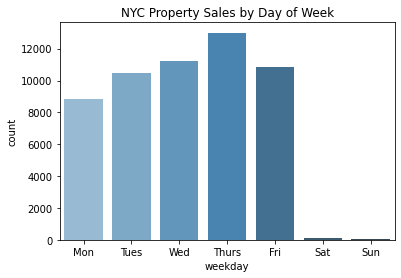

In [46]:
sns.barplot(x='sale_weekday', y='count', data=agg_sale_weekday, palette='Blues_d')
plt.xlabel('weekday')
plt.title('NYC Property Sales by Day of Week')
plt.show()

Interesting! Based on the plot above, we can see that Thursday was the most popular day to sell a property. It was quite rare to sell over the weekend, on Saturday and Sunday.